# sms-spam-classifier



In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [31]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [32]:
df.shape

(5572, 5)

In [3]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model building
# 5.Evaluation


# 1.Data Cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
# As last three columns has a very less non null values we will drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [36]:
df.sample(5)

,v1,v2
1451,ham,Ya! when are Ì_ taking ure practical lessons? ...
2133,ham,Spoke with uncle john today. He strongly feels...
183,ham,"He will, you guys close?"
2855,ham,"Japanese Proverb: If one Can do it, U too Can ..."
5512,ham,"Just making dinner, you ?"


In [37]:
# i will rename these columns to proper name
df.rename(columns={'v1':'Target','v2':'text'},inplace =True)

In [38]:
df.sample()

,Target,text
280,ham,You got called a tool?


In [39]:
# We will change ham and spam to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [40]:
df['Target']=encoder.fit_transform(df['Target'])

In [41]:
df.sample()

,Target,text
5349,0,I'm home...


In [42]:
# missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [43]:
# check for duplicate values
df.duplicated().sum()

403

In [44]:
df =df.drop_duplicates(keep='first')

In [45]:
df.shape

(5169, 2)

# 2.EDA

In [46]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [47]:
import matplotlib.pyplot as plt

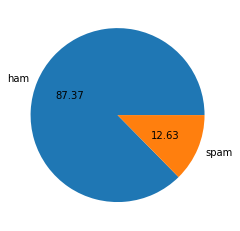

In [48]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [49]:
# We can see that there is imbalance in data
# let's see how much sentences,vowels ,words are used in sms text 

In [52]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 763 kB 46.9 MB/s eta 0:00:01


In [53]:
import nltk

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
df['num_character']=df['text'].apply(len)

/tmp/ipykernel_36/1812184597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['text'].apply(len)


In [56]:
df.head()

,Target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
# number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [58]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_36/76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [59]:
df.head()

,Target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [61]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_36/4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [62]:
df.head(10)

,Target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [63]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [64]:
df[df['Target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [65]:
df[df['Target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [66]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

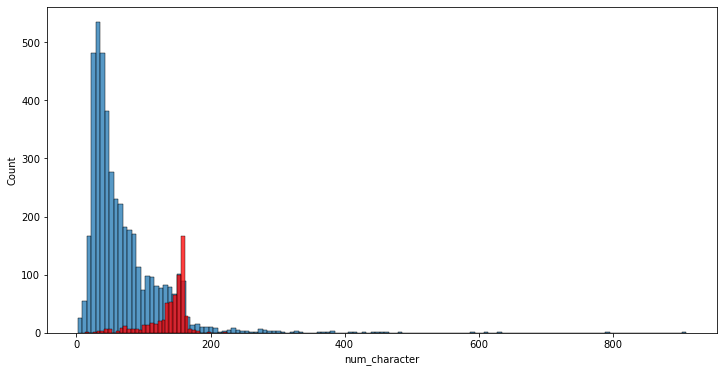

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

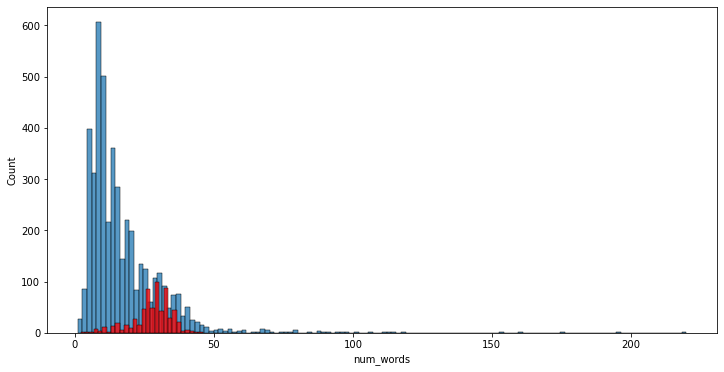

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

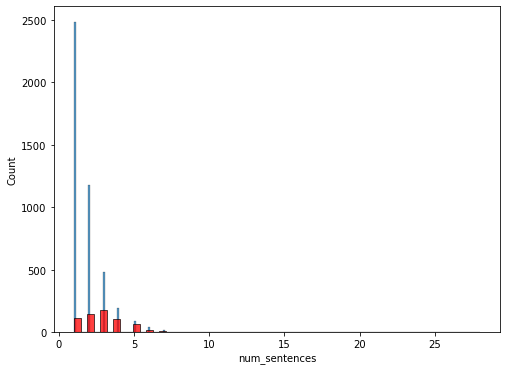

In [69]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')

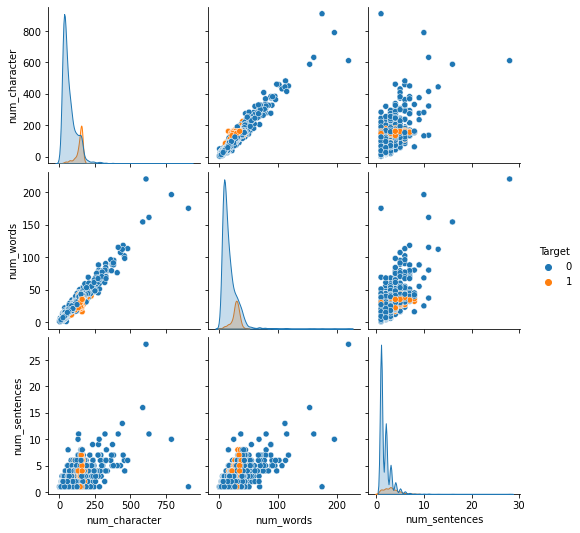

In [70]:
sns.pairplot(df,hue='Target')

In [71]:
df.corr()

,Target,num_character,num_words,num_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

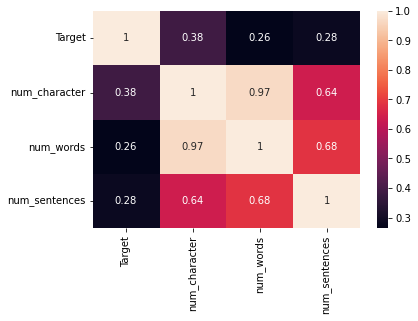

In [72]:
sns.heatmap(df.corr(),annot =True)

# Data Preprocessing
  * Lower case
  * Tokenization
  * Removing special characters
  * Removing stop words and punctuation
  * Stemming:  

In [77]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
import string


In [82]:
from nltk.stem.porter import Porterstemmer
ps = PorterStemmer()

ImportError: cannot import name 'Porterstemmer' from 'nltk.stem.porter' (/opt/conda/lib/python3.9/site-packages/nltk/stem/porter.py)

In [83]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [86]:
porter.stem('loving')

'love'

In [78]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [84]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(porter.stem(i))
    
        
    return " ".join(y)

In [85]:
transform_text("did u loved  my presentation on ML and is continuing")

'u love present ml continu'

In [87]:
df['transformed_text']=df['text'].apply(transform_text)

/tmp/ipykernel_36/4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [88]:
df.head()

,Target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
# word cloud of spam messages
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [90]:
!pip install wordcloud

     |████████████████████████████████| 363 kB 6.7 MB/s eta 0:00:01


In [112]:
# word cloud of spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [116]:
spam_wordcloud=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))

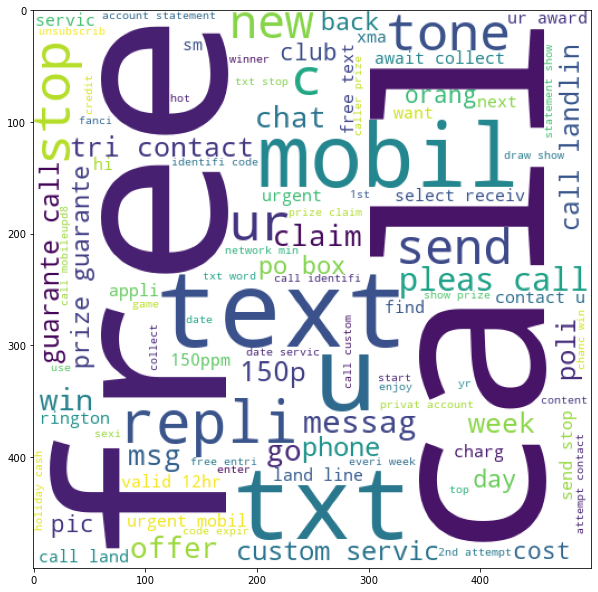

In [117]:
plt.figure(figsize=(10,14))
plt.imshow(spam_wordcloud)

In [118]:
ham_wordcloud=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))

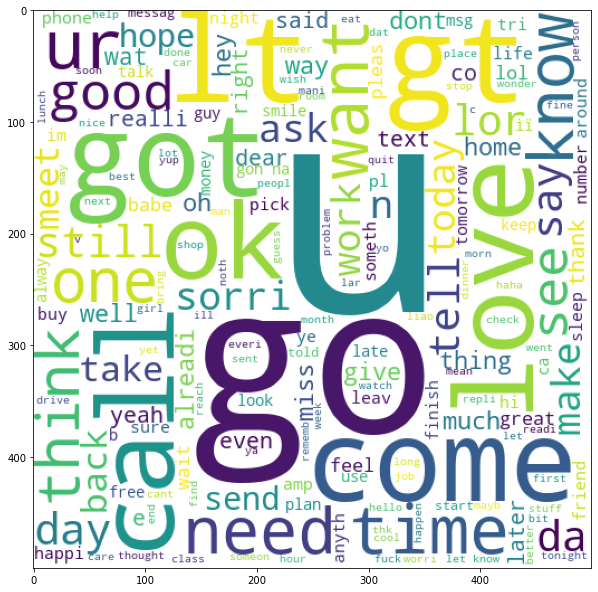

In [119]:
plt.figure(figsize=(10,14))
plt.imshow(ham_wordcloud)

In [120]:
# LEt us see top 30 words used in each categories

In [121]:
df.head()

,Target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [132]:
df[df['Target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [135]:
spam_corpus=[]
for message in df[df['Target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
    

In [137]:
len(spam_corpus)

9939

In [143]:
from collections import Counter

In [144]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [148]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [149]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


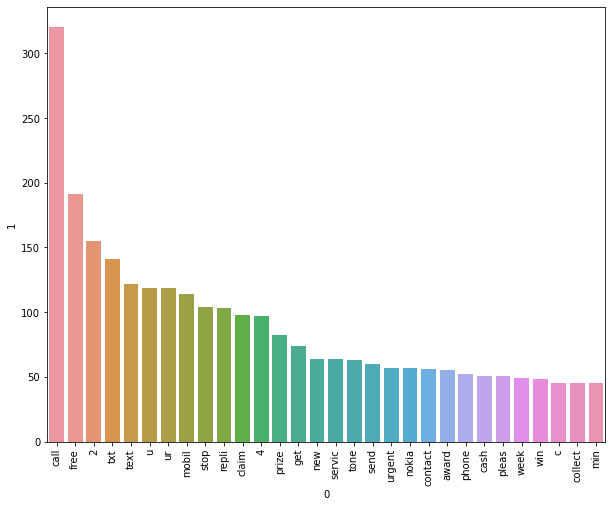

In [162]:
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [156]:
ham_corpus=[]
for message in df[df['Target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)
    

In [157]:
len(ham_corpus)

35394

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


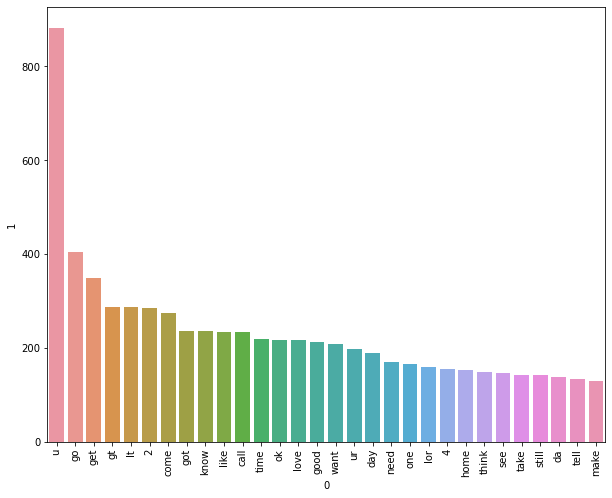

In [164]:
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [165]:
# Execute this to save new versions of the notebook
jovian.commit(project="sms-spam-classifier")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "indrakarki1001/sms-spam-classifier" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/indrakarki1001/sms-spam-classifier


'https://jovian.ai/indrakarki1001/sms-spam-classifier'

# Model Building

In [166]:
# Now we willl build model
# using Naive Bayes

In [167]:
# First of all we have to convert input to numbers/vectors
# vectorization
# BAg of words
# TFID

In [168]:
# vectorize input using Bag of words

In [170]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1ad1c5078fba7660aaa08c535bd800b05397b3ed8c5534f23f363afcf4302c2e
  Stored in directory: /home/jovyan/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


ModuleNotFoundError: No module named 'skleran'

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
cv =CountVectorizer()

In [174]:
cv

CountVectorizer()

In [175]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [176]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [177]:
X.shape

(5169, 6708)

In [179]:
y = df['Target'].values

In [180]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [184]:
X_train.shape

(4135, 6708)

In [193]:
y_train.shape

(4135,)

In [192]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [195]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()


In [196]:
gnb.fit(X_train,y_train)

GaussianNB()

In [198]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [199]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [200]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [203]:
tfidf = TfidfVectorizer()

In [206]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [208]:
X.shape

(5169, 6708)

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [210]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [211]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [212]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# We choose tfidf-> bnb

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [233]:
svc = SVC(kernel = 'sigmoid',gamma =1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')

In [234]:
clfs = {
    'SVC':svc,
    'KN' :knc,
    'DT' :dtc,
    'LR' :lrc,
    'NB' :bnb
}

In [235]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [236]:
 train_classifier(bnb,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9734513274336283)

In [237]:
accuracy_scores =[]
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy-  0.9284332688588007
Precision-  0.7580645161290323
For  KN
Accuracy-  0.90715667311412
Precision-  1.0
For  DT
Accuracy-  0.9245647969052224
Precision-  0.9285714285714286
For  LR
Accuracy-  0.9709864603481625
Precision-  0.9736842105263158
For  NB
Accuracy-  0.9700193423597679
Precision-  0.9734513274336283


In [238]:
perfomance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [239]:
perfomance_df

,Algorithm,Accuracy,Precision
0,SVC,0.928433,0.758065
1,KN,0.907157,1.000000
2,DT,0.924565,0.928571
3,LR,0.970986,0.973684
4,NB,0.970019,0.973451


In [240]:
# modelImprovement

In [ ]:
#1. change the max_features parameter of TfIdf

In [241]:
import pickle